In [2]:
!pip install -Uqq pandas_bokeh sktime pmdarima numpy==1.20.0

     |████████████████████████████████| 5.7MB 7.9MB/s 
     |████████████████████████████████| 1.5MB 51.4MB/s 
     |████████████████████████████████| 15.3MB 254kB/s 
     |████████████████████████████████| 22.3MB 113kB/s 
     |████████████████████████████████| 9.5MB 48.5MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: pmdarima 1.8.2 has requirement numpy~=1.19.0, but you'll have numpy 1.20.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_bokeh

from scipy.optimize import minimize
from bokeh.io import output_notebook

pd.options.plotting.backend = "pandas_bokeh"
output_notebook()

In [4]:
# https://otexts.com/fpp3/non-seasonal-arima.html
# LENGTH = 20
# AR_WEIGHTS = np.array([1.68, -0.80])
# MA_WEIGHTS = np.array([-0.69])
# C = 2.56
# E_STD = 2.837

In [20]:
LENGTH = 1000
AR_WEIGHTS = np.array([0.8, 0.2, 0, 0, 0])
MA_WEIGHTS = np.array([0.2] * 3)
C = 0
E_STD = 5

ar_order = len(AR_WEIGHTS)
ma_order = len(MA_WEIGHTS)

# np.random.seed(1)
e = np.random.normal(loc=0, scale=E_STD, size=LENGTH)
series = np.random.normal(loc=C, scale=C, size=max(ar_order, ma_order))

signal = series.copy()

# Normalise the weights
# AR_WEIGHTS = AR_WEIGHTS / np.linalg.norm(AR_WEIGHTS, ord=1)
# MA_WEIGHTS = MA_WEIGHTS / np.linalg.norm(MA_WEIGHTS, ord=1)



for i in range(ar_order, LENGTH):
  ar_x = series[-ar_order:] @ AR_WEIGHTS
  ma_e = e[:-1][-ma_order:] @ MA_WEIGHTS
  y = C + ar_x + ma_e + e[i]

  signal = np.append(signal, ar_x + ma_e)
  series = np.append(series, y)

ts = pd.Series(series, name="realised")
sig = pd.Series(signal, name="expected")
err = pd.Series(e, name="noise")

df = pd.concat([ts, sig, err], axis=1)

df.plot();
df.rolling(10).mean().plot();

In [6]:
import statsmodels.graphics.api as stg

In [7]:
def tsa_plots(*args):
  for a in args:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[16, 4])
    fig.suptitle(a.name, x=0.1, ha="left")
    stg.tsa.plot_acf(a, ax=ax1);
    stg.tsa.plot_pacf(a, ax=ax2);

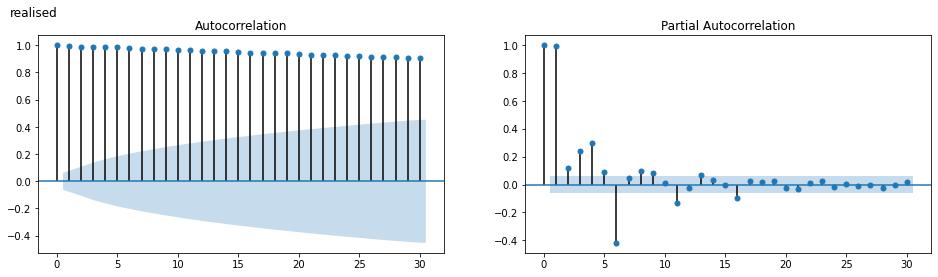

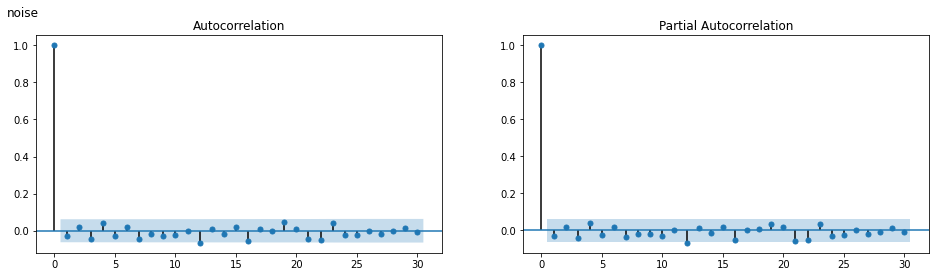

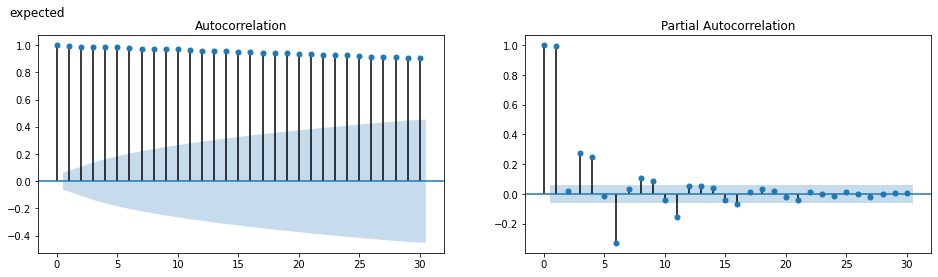

In [8]:
tsa_plots(ts, err, sig)

In [9]:
df["diff1"] = ts.diff()
df["diff2"] = ts.diff(2)
df = df.dropna().reset_index()

In [10]:
df[["realised", "diff1", "diff2"]].plot();
df[["realised", "diff1", "diff2"]].rolling(10).mean().plot();

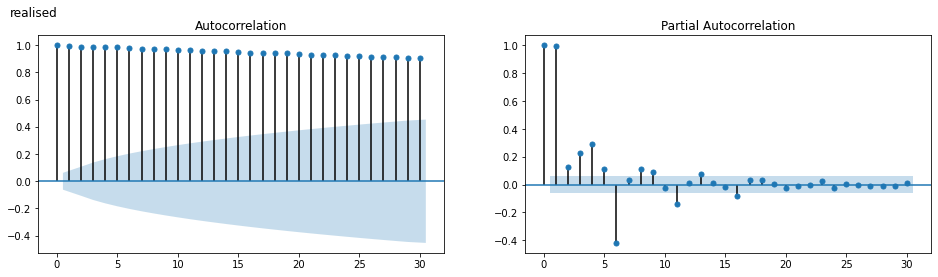

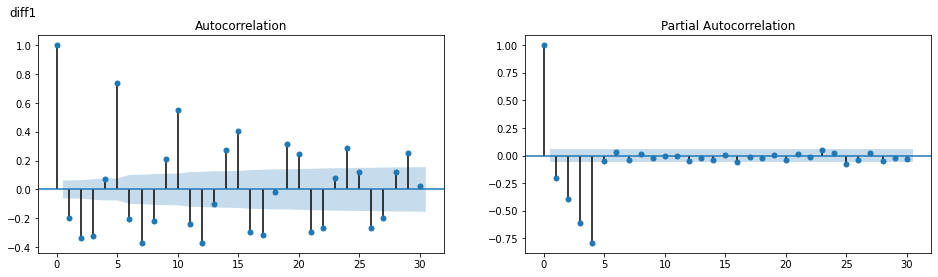

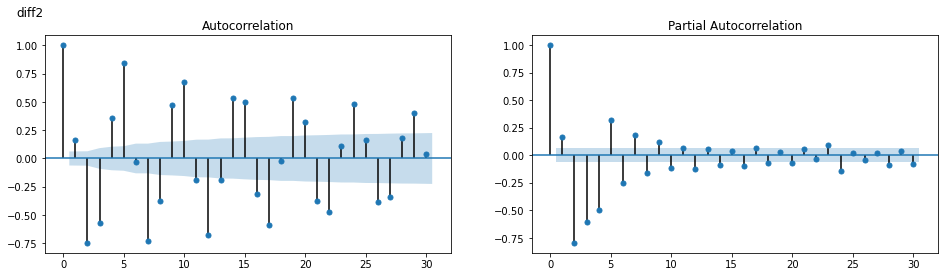

In [11]:
tsa_plots(df.realised, df.diff1, df.diff2)

# Maximum Likelihood Estimation

In [12]:
from sktime.forecasting.arima import AutoARIMA

In [13]:
arima = AutoARIMA()
arima.fit(y=df.diff1, fh=5)
print("-"*79)
print("Fitted Parameters")
print("-"*79)
arima.get_fitted_params()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmo

-------------------------------------------------------------------------------
Fitted Parameters
-------------------------------------------------------------------------------


{'ar.L1': -0.9961106857104328,
 'ar.L2': -1.002409473185954,
 'ar.L3': -1.0145612670748578,
 'ar.L4': -0.7865972647372683,
 'intercept': 2.211990033196826,
 'sigma2': 23.81036682081011}

In [14]:
arima

AutoARIMA()